# Adil Ashish Kumar

## Q1

In [ ]:
import numpy as np # np is an alias pointing to numpy
import pandas as pd # pd is an alias pointing to pandas
df = pd.read_csv("http://people.stern.nyu.edu/vt527/perf.data")

## Q2

In [4]:
df.head(10)

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
5,2,9,5,2,19,3
6,2,10,3,2,27,3
7,1,22,3,1,58,3
8,2,15,3,1,20,3
9,2,10,22,2,9,3


In [6]:
df.shape
# 150 rows and 6 columns

(150, 6)

In [45]:
a= ["attr1","attr2","attr3","attr4","attr5","attr6"]
df.columns = a

In [9]:
df.describe()

,attr1,attr2,attr3,attr4,attr5,attr6
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


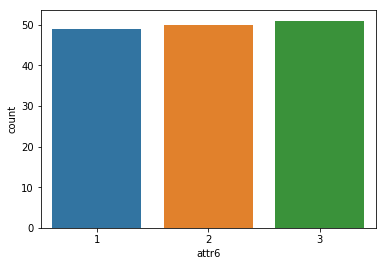

In [46]:
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['attr6'])


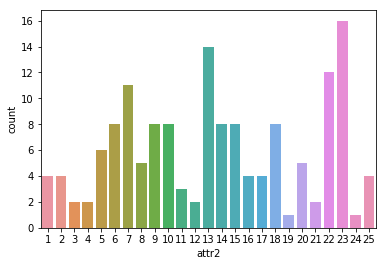

In [47]:
sns.countplot(df['attr2'])


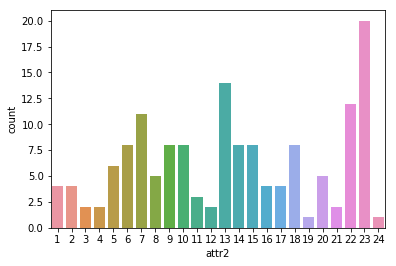

In [48]:
df.loc[df.attr2 == 25,'attr2'] = 23

sns.countplot(df['attr2'])

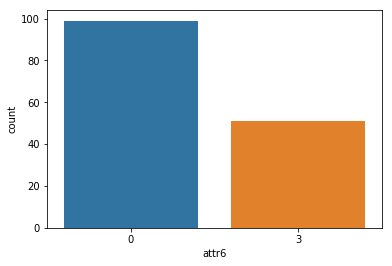

In [49]:
df.loc[(df.attr6 == 1) | (df.attr6 == 2),'attr6'] = 0

sns.countplot(df['attr6'])

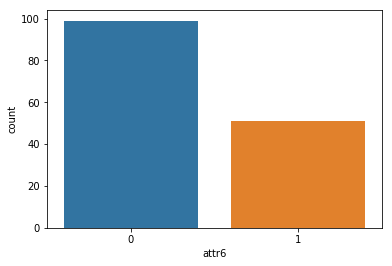

In [50]:
df.loc[(df.attr6 == 3),'attr6'] = 1
sns.countplot(df['attr6'])

In [51]:
df.head()

,attr1,attr2,attr3,attr4,attr5,attr6
0,2,15,3,1,17,1
1,1,23,3,2,49,1
2,1,5,2,2,33,1
3,2,7,11,2,55,1
4,2,23,3,1,20,1


## Q3

In [52]:
dfa= df.copy()
dfa.drop(dfa.columns[[1,2]],axis=1, inplace = True)

df_2 = pd.get_dummies(df['attr2'], drop_first=True)
df_3 = pd.get_dummies(df['attr3'], drop_first=True)
df_new = pd.concat([dfa, df_2,df_3], axis=1)
df_new.loc[(df_new.attr1 == 2),'attr1'] = 0
df_new.loc[(df_new.attr4 == 2),'attr4'] = 0
df_new.head()

,attr1,attr4,attr5,attr6,2,3,4,5,6,7,...,17,18,19,20,21,22,23,24,25,26
0,0,1,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,33,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,55,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.preprocessing import StandardScaler
y = df_new['attr6']
X = df_new.copy()
X.drop(X.columns[[3]],axis=1, inplace = True)# Features
 # Target variable

#Normalize Data
sc = StandardScaler()
#sc.fit(X_train)
sc.fit(X)
X_std = sc.transform(X)

y.head()

C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


0    1
1    1
2    1
3    1
4    1
Name: attr6, dtype: int64

In [58]:
X_std

array([[-0.47907014,  2.41209076, -0.84878666, ..., -0.08192319,
        -0.14285714, -0.08192319],
       [ 2.08737703, -0.4145781 ,  1.63698268, ..., -0.08192319,
        -0.14285714, -0.08192319],
       [ 2.08737703, -0.4145781 ,  0.39409801, ..., -0.08192319,
        -0.14285714, -0.08192319],
       ...,
       [ 2.08737703, -0.4145781 ,  1.55930239, ..., -0.08192319,
        -0.14285714, -0.08192319],
       [-0.47907014, -0.4145781 ,  1.79234327, ..., -0.08192319,
        -0.14285714, -0.08192319],
       [-0.47907014, -0.4145781 , -0.07198374, ..., -0.08192319,
        -0.14285714, -0.08192319]])

## Q4

In [93]:
from sklearn.metrics import matthews_corrcoef
import scipy as sp # sp is an alias pointing to scipy
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=32) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=6,random_state=32,criterion="entropy")
#Predict the response for test dataset
y_pred = clf.fit(X_train,y_train).predict(X_test)
clf_A = accuracy_score(y_test,y_pred)
clf_P = precision_score(y_test,y_pred)
clf_R = recall_score(y_test,y_pred)
clf_F = f1_score(y_test,y_pred)
a = matthews_corrcoef(y_test, y_pred)

print("The accuracy score of clf model is " + str(clf_A))    
print("The precision score of clf model is " + str(clf_P))
print("The recall score of clf model is " + str(clf_R))
print("The F measure of clf model is " + str(clf_F))
print("MCC is " + str(a))

The accuracy score of clf model is 0.7555555555555555
The precision score of clf model is 0.5
The recall score of clf model is 0.45454545454545453
The F measure of clf model is 0.47619047619047616
MCC is 0.3178542458730997


In [61]:
from sklearn.model_selection import cross_val_score
#Decision tree Regression Model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=6,random_state=32,criterion="entropy")
scores_tree = cross_val_score(tree, X_std, y, cv=10)
print("Performance: %0.3f (+/- %0.3f)" % (scores_tree.mean(), scores_tree.std() * 2))

Performance: 0.766 (+/- 0.253)


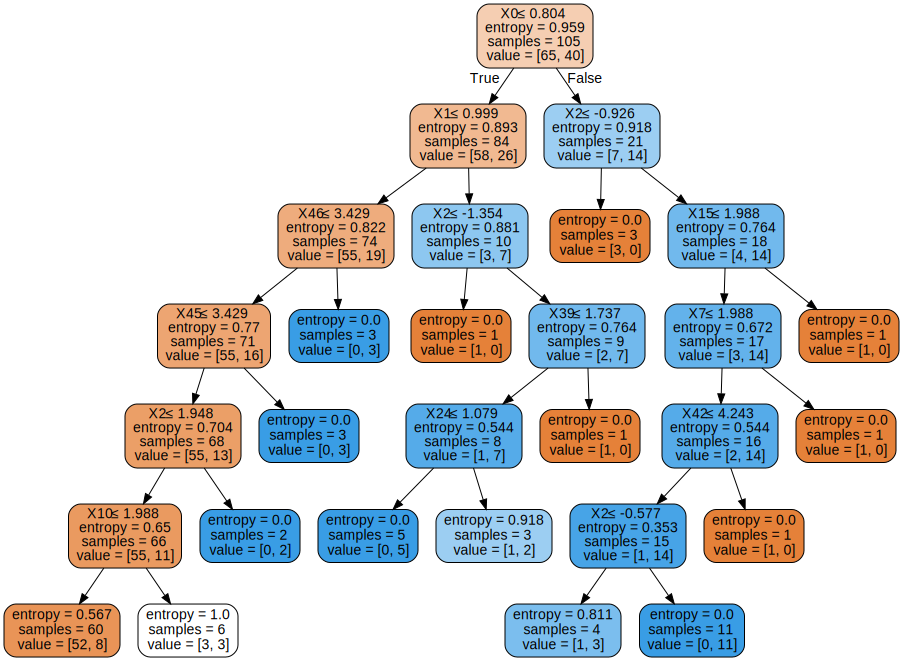

In [63]:
from sklearn.tree import export_graphviz  
from sklearn import tree
import graphviz 

dtreeexp = tree.export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
treegraph = graphviz.Source(dtreeexp) 
treegraph

## Q5

In [94]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report
clf = linear_model.LogisticRegression(C=100,penalty='l1')

clf = clf.fit(X_train, y_train)
print('The weights of the attributes are:', clf.coef_)
#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
y_pred_insample = clf.predict(X_train)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

#Predict the response for test dataset
clf_A = accuracy_score(y_test,y_pred)
clf_P = precision_score(y_test,y_pred)
clf_R = recall_score(y_test,y_pred)
clf_F = f1_score(y_test,y_pred)

print("The accuracy score of clf model is " + str(clf_A))    
print("The precision score of clf model is " + str(clf_P))
print("The recall score of clf model is " + str(clf_R))
print("The F measure of clf model is " + str(clf_F))

from sklearn.metrics import matthews_corrcoef
 
a = matthews_corrcoef(y_test, y_pred) 
print("MCC is " + str(a))

The weights of the attributes are: [[ 0.51071714  0.63266695  3.08669498 -0.96178594 -0.92289613 -0.53288826
  -0.62226202 -0.81591498 -5.5618928  -0.56802501  0.29590178  0.
  -1.62633185  0.         -0.32549701 -1.88689592  0.31429248 -0.54619058
   1.26798158 -1.43836221  0.         -0.17682899  0.         -1.64287517
  -0.64204008 -0.30082858  0.0581535   1.3754485   0.          0.90903961
   0.57164499 -0.81402077 -0.66218931  0.          0.          5.2457744
   0.         -1.25495262  0.97514715  0.11085703  0.          0.
  -2.13894018  0.          0.          2.30694785  2.63065454  0.
  -0.43982741  1.83854003 -0.05134328]]
1 [0.43701433 0.56298567] 1.0
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        34
           1       0.38      0.45      0.42        11

   micro avg       0.69      0.69      0.69        45
   macro avg       0.60      0.61      0.60        45
weighted avg       0.71      0.69      0.70        45

T

In [67]:

#logistic Regression Model
lr = linear_model.LogisticRegression(C=100,penalty='l1',random_state=32)
scores_lr = cross_val_score(lr, X_std, y, cv=10)
print("Performance: %0.3f (+/- %0.3f)" % (scores_lr.mean(), scores_lr.std() * 2))

C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

Performance: 0.760 (+/- 0.160)


C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Q6

In [95]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3) #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
                                               # with p=1 is equivalent to the Mahattan distance.

# Train the model      
clf = knn.fit(X_train, y_train) 


y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
y_pred_insample = clf.predict(X_train)
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

#Predict the response for test dataset
clf_A = accuracy_score(y_test,y_pred)
clf_P = precision_score(y_test,y_pred)
clf_R = recall_score(y_test,y_pred)
clf_F = f1_score(y_test,y_pred)

print("The accuracy score of clf model is " + str(clf_A))    
print("The precision score of clf model is " + str(clf_P))
print("The recall score of clf model is " + str(clf_R))
print("The F measure of clf model is " + str(clf_F))

from sklearn.metrics import matthews_corrcoef
 
a = matthews_corrcoef(y_test, y_pred) 
print("MCC is " + str(a))

0 [1. 0.] 1.0
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        34
           1       0.44      0.36      0.40        11

   micro avg       0.73      0.73      0.73        45
   macro avg       0.62      0.61      0.61        45
weighted avg       0.72      0.73      0.72        45

The accuracy score of clf model is 0.7333333333333333
The precision score of clf model is 0.4444444444444444
The recall score of clf model is 0.36363636363636365
The F measure of clf model is 0.39999999999999997
MCC is 0.23268946049775863


In [71]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
scores_knn = cross_val_score(knn, X_std, y, cv=10)
print("Performance: %0.3f (+/- %0.3f)" % (scores_knn.mean(), scores_knn.std() * 2))

Performance: 0.698 (+/- 0.248)


## Q7

C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


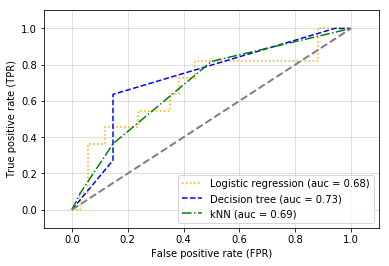

In [74]:
############################### Import Libraries & Modules #################################
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier 

clf1 = linear_model.LogisticRegression(C=100,penalty='l1')
clf2 = DecisionTreeClassifier(max_depth=6,random_state=32,criterion="entropy")
clf3 = neighbors.KNeighborsClassifier(n_neighbors=3)

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):
        # Assuming the label of the positive class is 1 and data is normalized
        y_pred = clf.fit(X_train,y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
        fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
        roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
        plt.plot(fpr, tpr,color=clr,linestyle=ls,label='%s (auc = %0.2f)' % (label, roc_auc))


plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

In [ ]:
# i would choose  Decision tree since it has highest auc

## Q8

In [75]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


inner_cv = KFold(n_splits=5, shuffle=True,random_state=32)
outer_cv = KFold(n_splits=5, shuffle=True,random_state=32)
    
############################## Decision Tree Parameter Tuning ##############################

# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6,7,8,9,10, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
                              'min_samples_split':[2,3,4,5,6,7,8,9,10]}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)

gs_dt = gs_dt.fit(X_train,y_train)
print("\n Parameter Tuning - Decision Tree")
print("Non-nested CV F1 Score: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X_train, y=y_train, cv=outer_cv)
print("Nested CV F1 Score: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


 Parameter Tuning - Decision Tree
Non-nested CV F1 Score:  0.6295195001077354
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\skl

Nested CV F1 Score:  0.5648136177547942  +/-  0.07218650113747196


C:\Users\Adil Ashish Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Q9

In [79]:
from sklearn.linear_model import LogisticRegression 
gs_lr = GridSearchCV(estimator=LogisticRegression(),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='f1',
                  cv=inner_cv)

gs_lr = gs_lr.fit(X_train,y_train)
print("\n Parameter Tuning Logistic Regression")
print("Non-nested CV F1 Score: ", gs_lr.best_score_)
print("Optimal Parameter: ", gs_lr.best_params_)
print("Optimal Estimator: ", gs_lr.best_estimator_)
nested_score_gs_lr = cross_val_score(gs_lr, X=X_train, y=y_train, cv=outer_cv)
print("Nested CV F1 Score:",nested_score_gs_lr.mean(), " +/- ", nested_score_gs_lr.std())


 Parameter Tuning Logistic Regression
Non-nested CV F1 Score:  0.6238522399513112
Optimal Parameter:  {'C': 0.01, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Nested CV F1 Score: 0.611812865497076  +/-  0.08300336848949307


## Q10

In [78]:
import sys ,warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# Choosing k for kNN AND type of distance
gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29],
                               'weights':['uniform','distance']}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=5)

gs_knn = gs_knn.fit(X_train,y_train)  
print("\n Parameter Tuning - KNN algorithm")
print("Non-nested CV F1 Score: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn = cross_val_score(gs_knn, X=X_train, y=y_train, cv=outer_cv)
print("Nested CV F1 Score: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


 Parameter Tuning - KNN algorithm
Non-nested CV F1 Score:  0.586218487394958
Optimal Parameter:  {'n_neighbors': 5, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')
Nested CV F1 Score:  0.5060586472351177  +/-  0.18279815307439823


## Q11

In [80]:
import pandas as pd
import math
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
clf1 = linear_model.LogisticRegression(C=0.01,penalty='l2')

In [81]:
#Cost assumptions
'''Cost of FP: 1, cost of FN: 2, cost of TN: 0, cost of TP: -1'''
cost_TP = 100; cost_FP = -50; cost_FN = 0; cost_TN = 0;
cb_matrix = -1*np.array([[cost_TP, cost_FP],[cost_FN, cost_TN]])


In [82]:

#Convert to standard confusion matrix
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    
    return np.array([[TP,FP],[FN,TN]])

In [83]:

def profit_curve(cb, predict_probas, labels):
    #predict_probas = round(predict_probas,4)
    indices = np.argsort(predict_probas)
    sorted_probs = predict_probas[indices]
    sorted_labels = labels[indices]
    
    profit_list = []
    
    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [84]:
# Plot the profit curves
def plot_profit_curve(model, label, costbenefit, X_std, X_test, y_train_sm, y_test, col):
    model.fit(X_std, y_train_sm)
    predict_probas = model.predict_proba(X_test)[:,1]
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]
    
    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

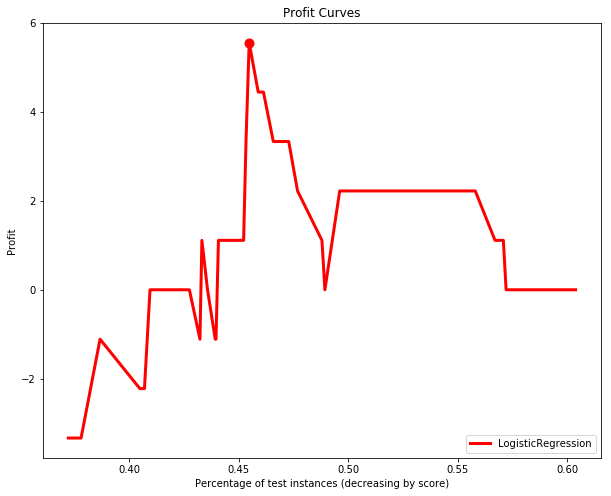

In [85]:
models = [clf1]
fig = plt.figure(figsize=(10,8))
# fig.set_facecolor('#F2F2F2')
colors = ['r', 'g', 'b', 'm']
for i, model in enumerate(models):
    plot_profit_curve(model, model.__class__.__name__, cb_matrix,
                      X_train, X_test, y_train, y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()

## Q12

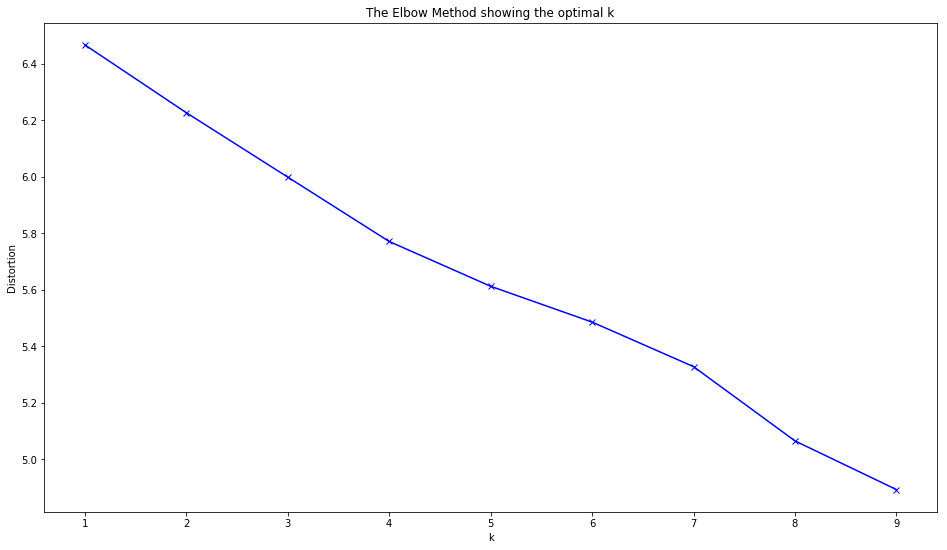

In [88]:
######################################## k-means Elbow Method (NTK) ########################################


# Elbow method
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [96]:
######################################## k-means Clustering (NTK) ########################################

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Initializing KMeans
kmeans = KMeans(n_clusters=9)
# Fitting with inputs
kmeans = kmeans.fit(X_train)
# Predicting the clusters
labels = kmeans.predict(X_train)
# Getting the cluster centers
C = kmeans.cluster_centers_